<a href="https://colab.research.google.com/github/kshitijzutshi/INFO7390-Advances-in-Data-Science/blob/main/K_means_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

In [ ]:
# Eucleadian distance function definition

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [ ]:
# Implement K-means class

class KMeans:
    
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        
        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # mean feature vector for each cluster
        self.centroids = []
    
    # Since this is an Unsupervised learning problem we dont have to fit the model
    def predict(self, x):
        self.x = x
        self.n_samples, self.n_features = x.shape
        
        # initialize the centroid
        
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.x[idx] for idx in random_sample_idxs]
        
        # Optimizations
        for _ in range(self.max_iters):
            
            # update cluster - using helper fn _create_cluster
            self.clusters = self._create_clusters(self.centroids)
            
            if self.plot_steps:
                self.plot()
            
            # update centroids
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            if self.plot_steps:
                self.plot()
            
            # check if converged
            if self._is_converged(centroids_old, self.centroids):
                break
            
        # return cluster labels
        return self._get_cluster_labels(self.clusters)
    
    def _create_clusters(self, centroids):
        
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.x):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def _closest_centroid(self, sample, centroids):
        
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
    
    def _get_centroids(self, clusters):
        
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.x[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    
    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
        
        
    def _get_cluster_labels(self, clusters):
        
        # this label just holds the cluster the sample belongs to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
                
        return labels
    
    
    def plot(self):
        
        fig, ax = plt.subplots(figsize=(12,8))
        
        for i, index in enumerate(self.clusters):
            point = self.x[index].T
            ax.scatter(*point)
        
        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)
        
        plt.show()
        
        
        
        

(500, 2)
4


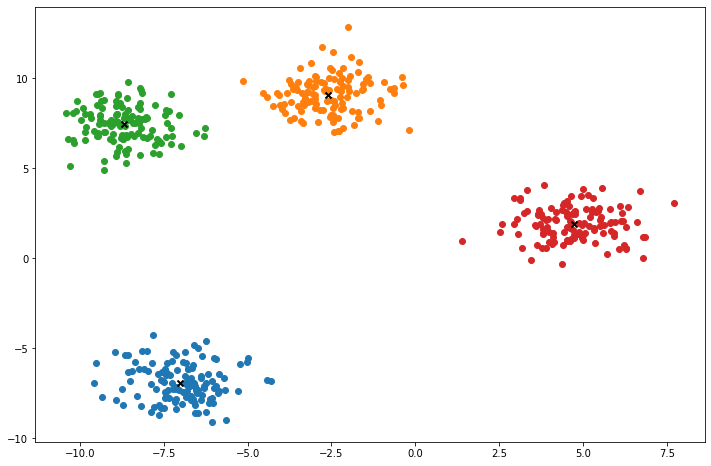

In [ ]:
from sklearn.datasets import make_blobs

X,y = make_blobs(centers=4, n_samples=500, n_features=2, shuffle=True, random_state=42)

print(X.shape)

clusters = len(np.unique(y))
print(clusters)

k = KMeans(K=clusters, max_iters=150, plot_steps=False)
y_pred=k.predict(X)

k.plot()

(500, 2)
4


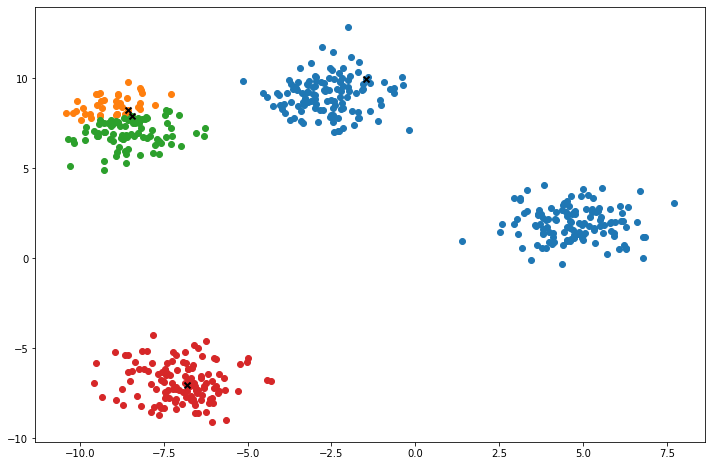

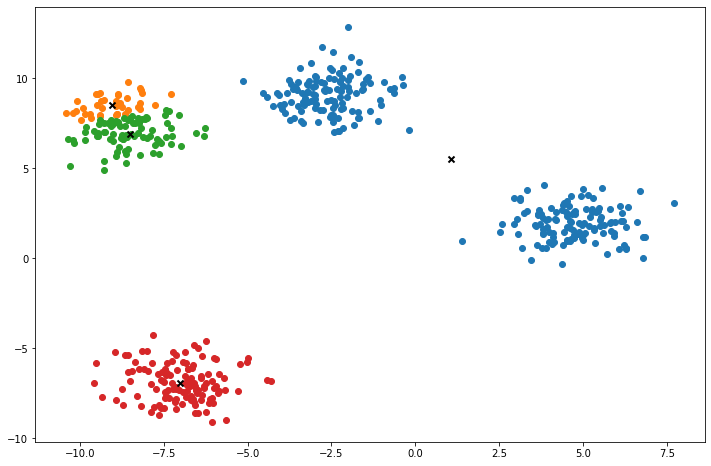

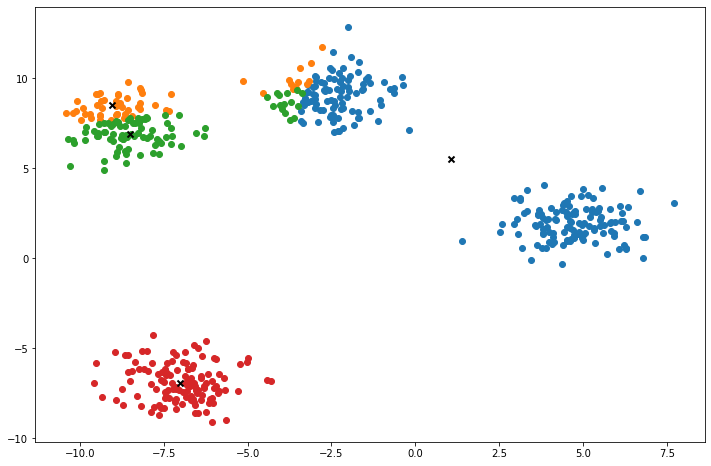

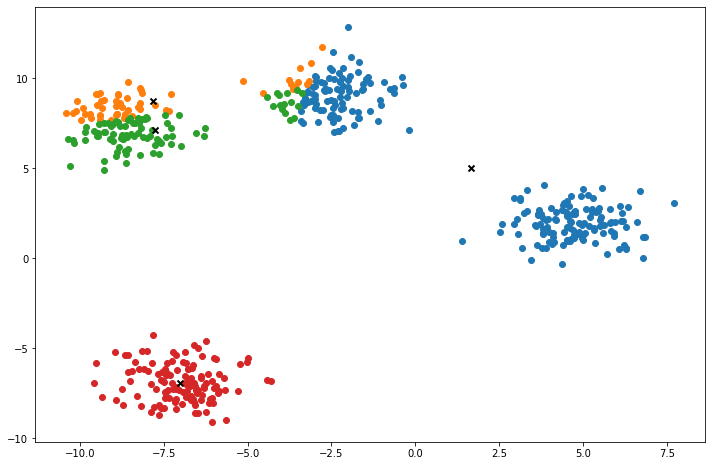

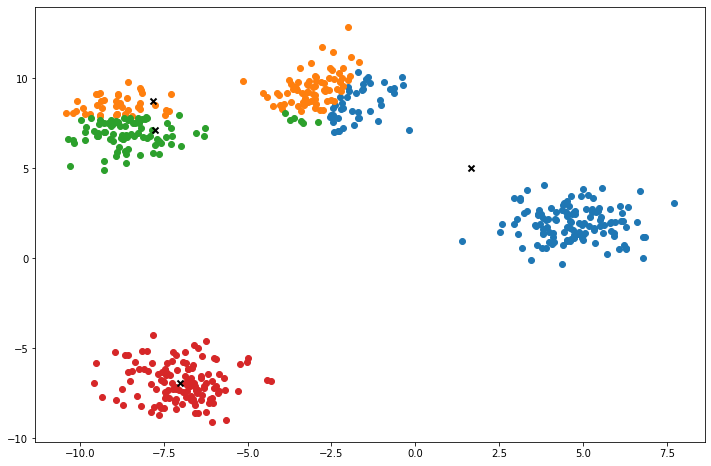

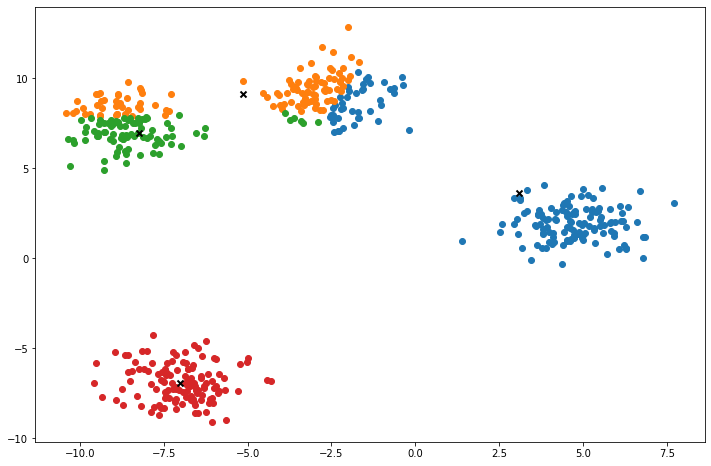

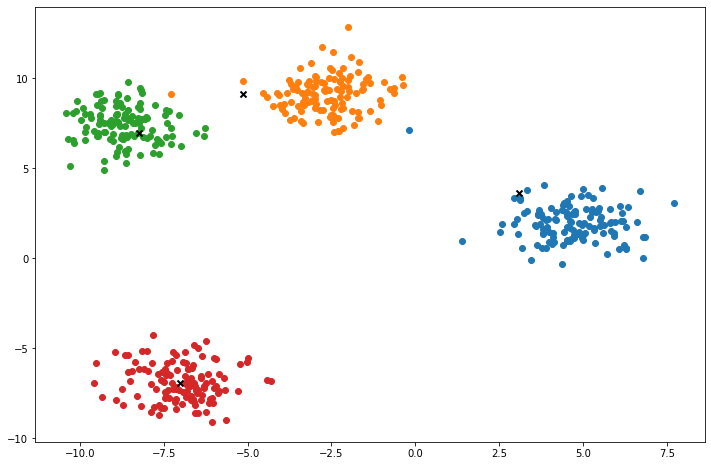

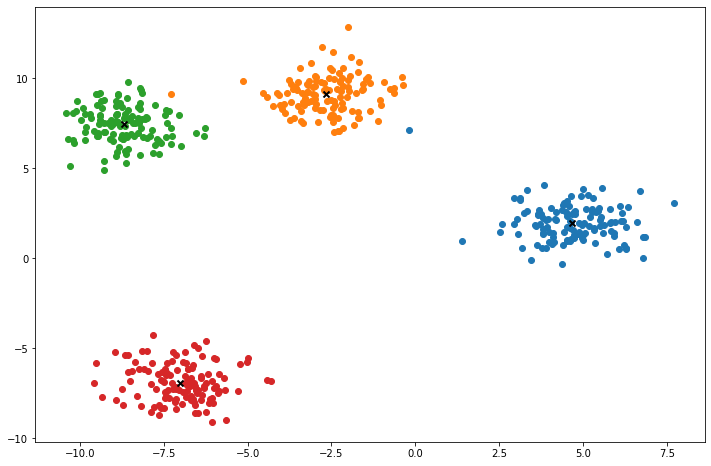

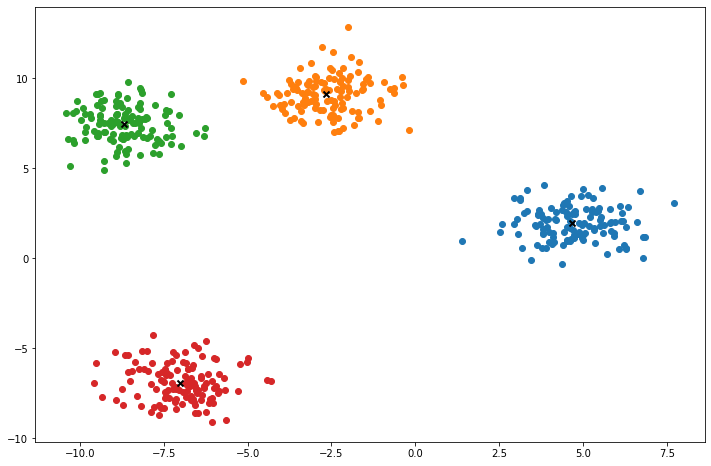

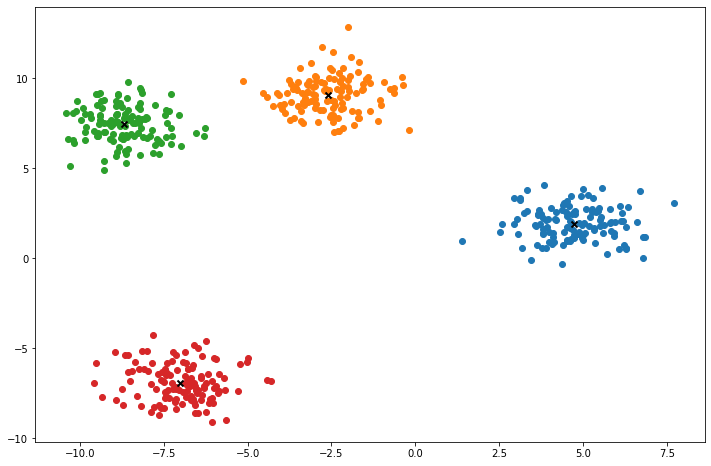

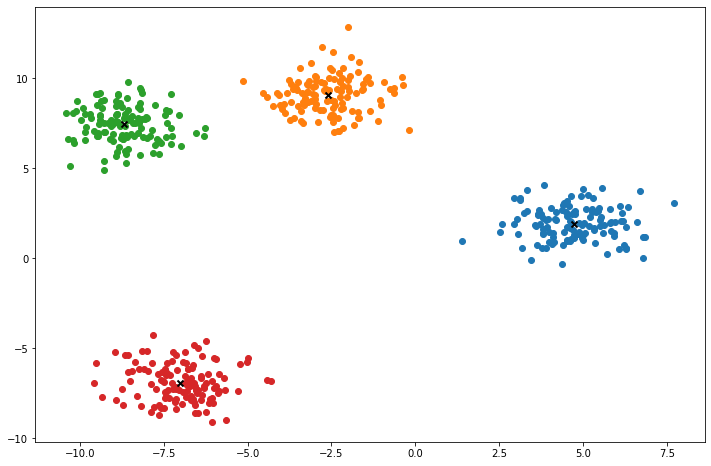

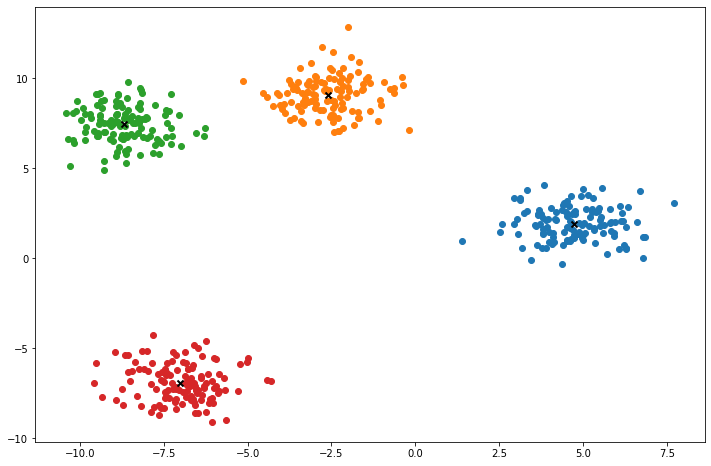

In [ ]:
from sklearn.datasets import make_blobs

X,y = make_blobs(centers=4, n_samples=500, n_features=2, shuffle=True, random_state=42)

print(X.shape)

clusters = len(np.unique(y))
print(clusters)

k = KMeans(K=clusters, max_iters=150, plot_steps=True)
y_pred=k.predict(X)

# k.plot()